In [1]:
import scanpy as sc
import scvi
from matplotlib import rcParams
import matplotlib.pyplot as plt

folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc/"

# Load data

In [2]:
# Read in the data
adata = sc.read(folder_path + "adata_scVI.h5ad")
model = scvi.model.SCVI.load(folder_path + "model/", adata)

INFO     File C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc/model/model.pt already downloaded 


c:\Users\heung\anaconda3\Lib\site-packages\scvi\data\fields\_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [3]:
# Clustering
sc.tl.leiden(adata, resolution=1)

# run time: 1m 46s
# run time: 24.9s for adata_harmony.h5ad

C:\Users\heung\AppData\Local\Temp\ipykernel_91536\2482634620.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1)


c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:434: PerformanceWarning: DataFrame is highly fragmented.  This is usually t

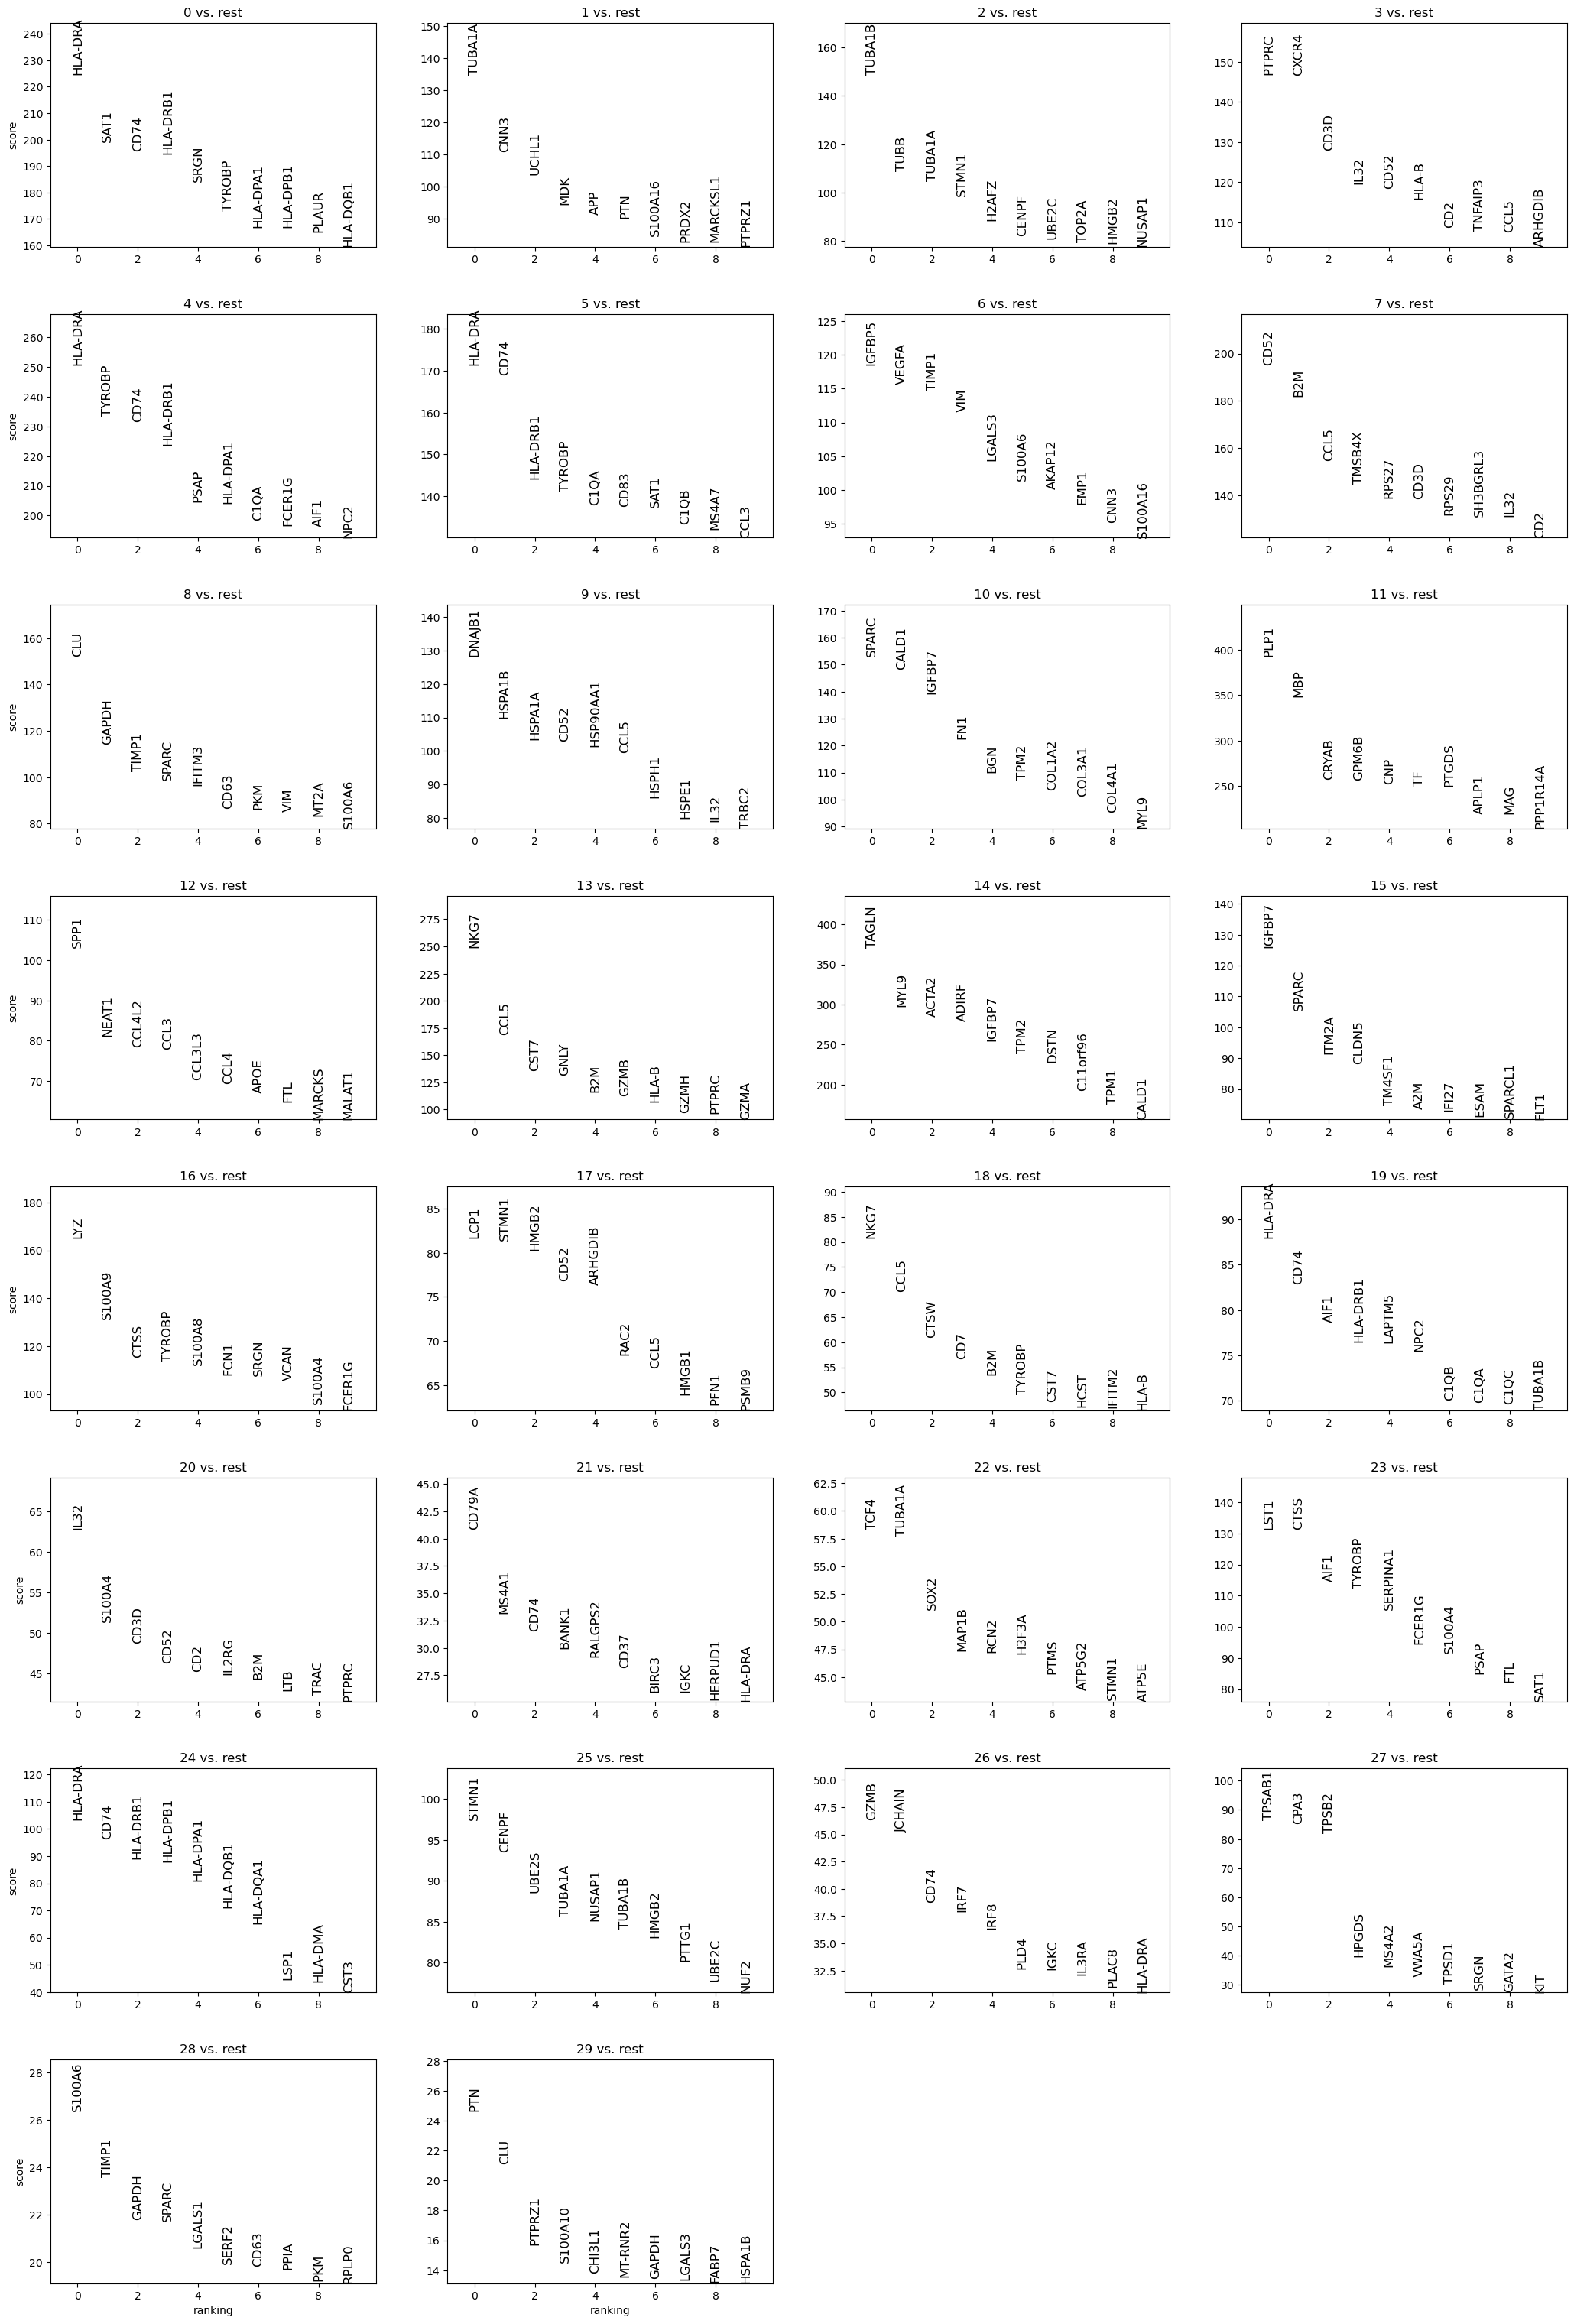

In [4]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes = 10, sharey = False, fontsize = 12)

# run time: 27s
# run time: 39s for adata_harmony.h5ad

# Finding markers

In [ ]:
# making markers
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]

In [ ]:
# making markers_scvi
# 18개 cluster DEG 찾는데 약 3분 소요
markers_scvi = model.differential_expression(groupby = 'leiden')

# markers_scvi filtering
# FDR < 0.05 and logFC > 0.5
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

FDR (false discovery rate)\
FDR < 0.005 :위양성의 비율이 0.05 미만이다.\
LFC: log fold change

# Visualizing UMAP cluster

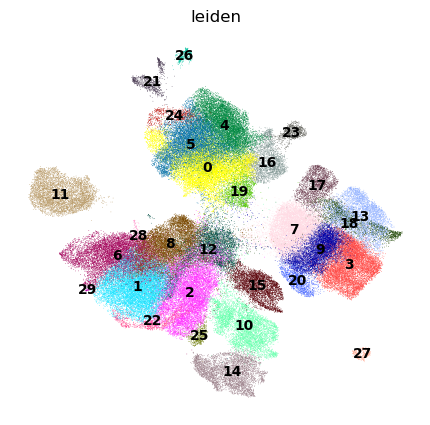

In [28]:
rcParams['figure.figsize'] = (5.3, 5)

sc.pl.umap(
    adata,
    color = ['leiden'],
    frameon = False,
    legend_loc = 'on data'
)

# Cell type annotation

In [ ]:
for i in range(30):
    print(f'"{i}": "", ')

In [36]:
cell_type = {
"0": "Macrophages", 
"1": "etc.", 
"2": "etc.", 
"3": "T cells", 
"4": "Microglia", 
"5": "Microglia", 
"6": "etc.", 
"7": "T cells", 
"8": "etc.", 
"9": "T cells", 
"10": "etc.", 
"11": "Oligodendrocytes", 
"12": "etc.", 
"13": "NK cells", 
"14": "etc.", 
"15": "etc.", 
"16": "Macrophages", 
"17": "T cells", 
"18": "NK cells", 
"19": "Macrophages", 
"20": "T cells", 
"21": "DC", 
"22": "etc.", 
"23": "DC", 
"24": "etc.", 
"25": "etc.", 
"26": "DC", 
"27": "Mast cells", 
"28": "etc.", 
"29": "etc.", 
}

## Gene expression in feature plot

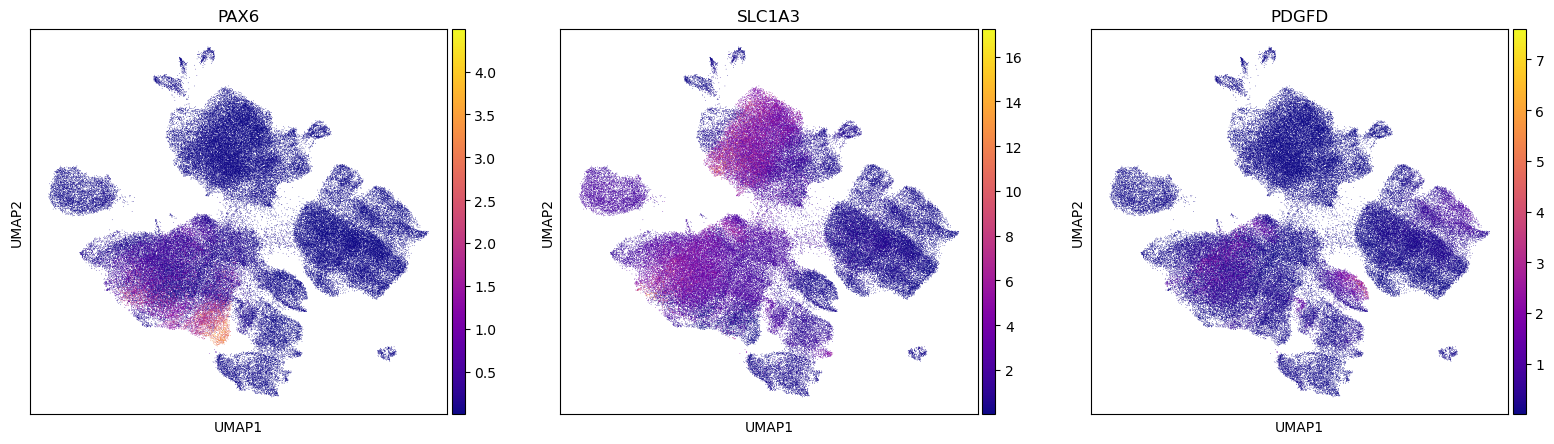

In [35]:
rcParams['figure.figsize'] = (5.5, 5)

sc.pl.umap(
    adata,
    color = ['PAX6', 'SLC1A3', 'PDGFD'],
    # frameon = False,
    layer = 'scvi_normalized',
    color_map = 'plasma',
)

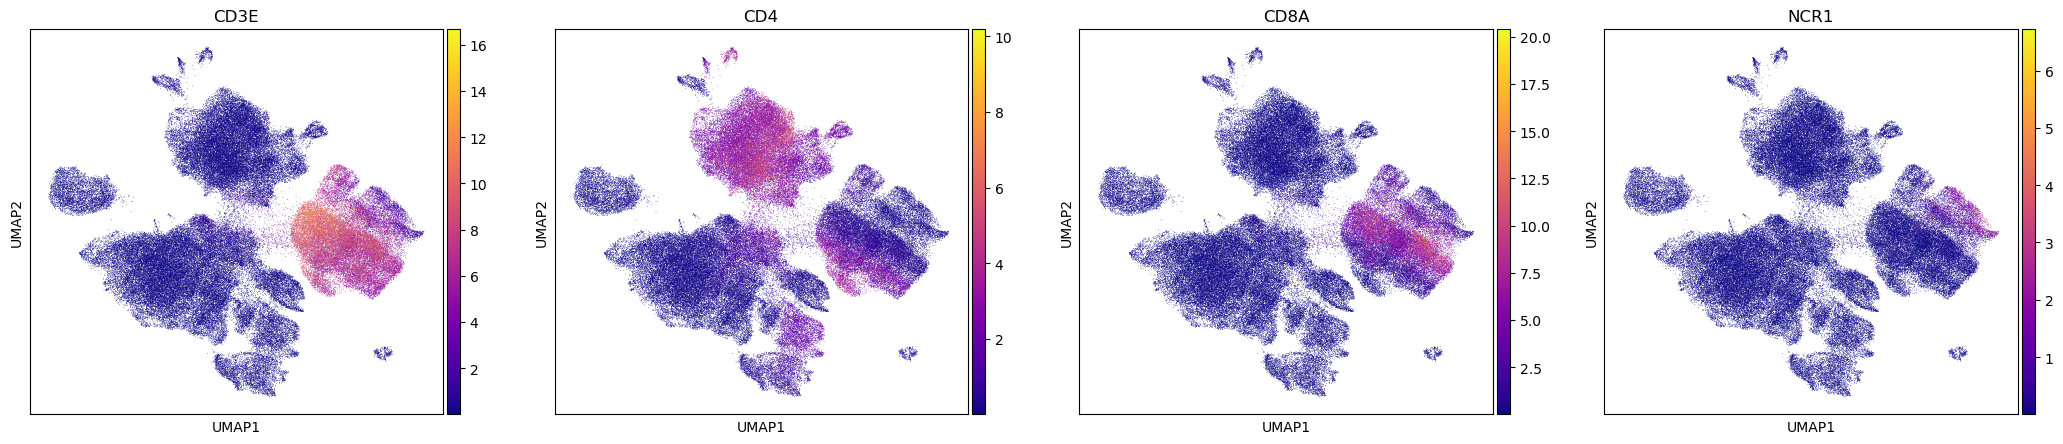

In [30]:
rcParams['figure.figsize'] = (5.5, 5)

sc.pl.umap(
    adata,
    color = ['CD3E', 'CD4', 'CD8A', 'NCR1'],
    # frameon = False,
    layer = 'scvi_normalized',
    color_map = 'plasma',
)

## Gene expression by violin plot

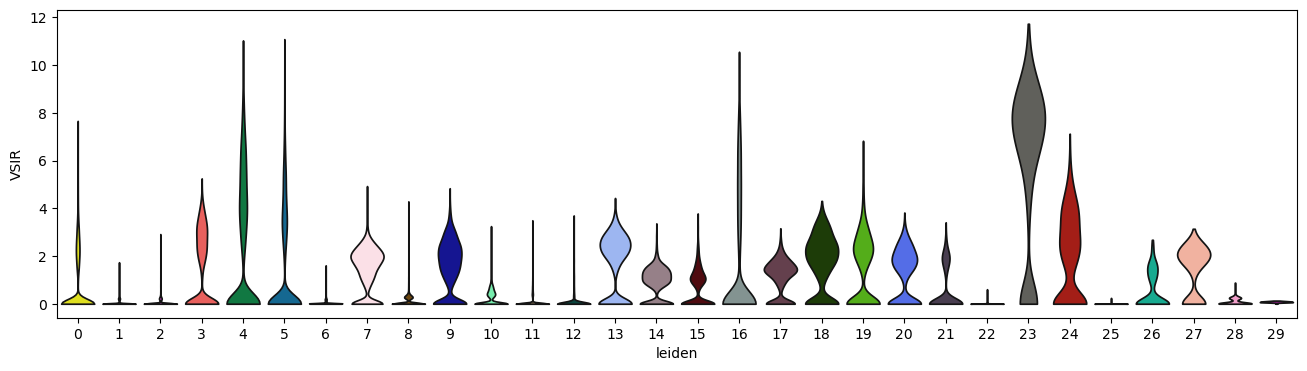

In [26]:
fig, ax = plt.subplots(figsize = (16, 4))

sc.pl.violin(
    adata,
    keys = ['VSIR'],
    groupby = 'leiden',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
)

## Search cluster by gene name

In [ ]:
# 유전자를 입력하면 높게 발현하는 cluster를 보여줌
markers[markers.names == 'P2ry12']

## Search genes highly expressed in the cluster

In [ ]:
# cluster를 입력하면 높게 발현하는 유전자를 보여줌
for item in markers_scvi[markers_scvi.group1 == '15'][0:10].index:   # 10 개 까지 보여줌
    print(item)

## Cell type 설정

In [37]:
# Assigning cell types
# adata obs에 cell_type column 추가
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
adata.obs.head(5)

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cell_type
AAACCCAGTGAATGTA-1,Pt1,370,500.0,2.200000,11.400000,0,0,5,Microglia
AAACCCATCCATTCAT-1,Pt1,1068,3611.0,43.035172,3.073941,0,0,0,Macrophages
AAACGAAAGCTAGCCC-1,Pt1,523,1103.0,36.536716,2.991840,0,0,3,T cells
AAACGAAAGCTCTGTA-1,Pt1,654,1564.0,25.831202,2.941176,0,0,0,Macrophages
AAACGAATCACGAACT-1,Pt1,414,545.0,0.366972,12.660551,0,0,6,etc.


## Cell type 확인

### UMAP 확인

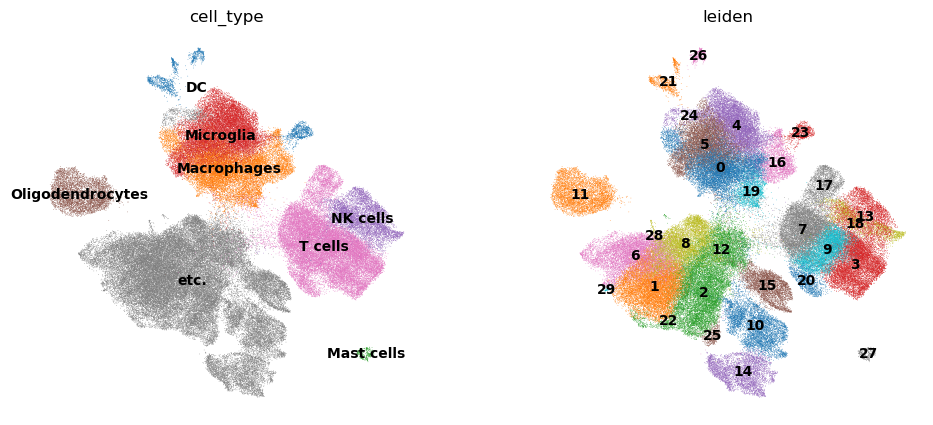

In [40]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['cell_type', 'leiden'],
    frameon = False,
    legend_loc = 'on data',
    palette = sc.pl.palettes.vega_10
)

### Violin plot gene expression 확인

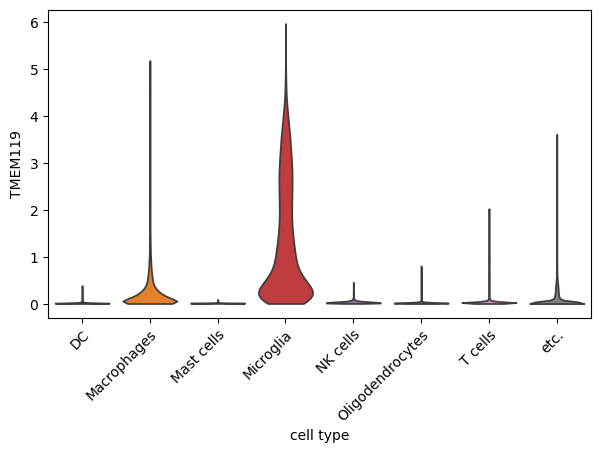

In [47]:
fig, ax = plt.subplots(figsize = (7, 4))

sc.pl.violin(
    adata,
    keys = ['TMEM119'],
    groupby = 'cell_type',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
    show = False
)

plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')   # x 축 레이블 회전
plt.show()

### Dot plot

In [ ]:
marker_genes_dict = {
    'Microglia': ['P2ry12', 'Tmem119'],
    'Activated microglia' : ['H2-D1', 'H2-Aa'],
    'Mo/Mp' : ['Ly6i', 'Ly6c2'],
    'BAM' : ['Ms4a7', 'Mrc1'],
    'T cells' : ['Cd3e', 'Nkg7'],
    'B cells' : ['Cd19', 'Cd79b'],
    'Etc.' : ['Cox7b2', 'Serpinh1'],
}

In [ ]:
# sc.tl.dendrogram(adata, groupby = 'cell_type')    # dot plot 한번 그린 후 cell type annotation 바꾸면 이거 돌려줘야 함

sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby = 'cell_type',
    dendrogram = True,
    var_group_rotation = 45,
    cmap = 'Greens',
)

In [48]:
adata

AnnData object with n_obs × n_vars = 126563 × 41541
    obs: 'sample', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'sample_colors', 'umap', 'leiden', 'rank_genes_groups', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

# Save

In [ ]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

adata.write_h5ad(folder_path + "annotated.h5ad")
# 3,446,216 kb